<html>
    <header>
        <body> 
            <font size="6">1. Cargar librerías a utilizar </font>
        </body>
    </header>
</html>

In [1]:
import sys, os, json
import time
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn_genetic import GASearchCV
from sklearn_genetic import ExponentialAdapter
from sklearn_genetic.space import Continuous, Integer, Categorical


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_seq_items', None)

seed = 42

### Definición de funciones

In [2]:
def boxplots_data(data):
    for var in data:

        x = data[var].values

        # Se crea el espacio para los gráficos
        fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(10, 4))
        # Se grafica el boxplot

        ax1.boxplot(x)
        ax1.set_title( 'Boxplot for {}'.format(var) )

        # Se grafica el histograma

        ax2.hist(x, bins=30)
        ax2.set_title( 'Histogram for {}'.format(var) )
        plt.show()

<html>
    <header> <br>
        <body> 
            <font size="6">2. Lectura de insumos </font><br>
        </body>
    </header>
</html>

In [21]:
df = pd.read_csv("src/patient_priority.csv",sep=",",index_col=0)
df.head(5)

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked,yellow
1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked,yellow
3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked,yellow


In [22]:
df.dropna(subset=['triage'], inplace=True)
df.dropna(subset=['gender'], inplace=True)

In [23]:
df_x = df.drop(["triage"],axis=1)
df_y = df[["triage"]]

In [24]:
df_x.head(5)

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status
0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked
1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked
2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked
3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked
4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked


In [25]:
df_y.head(5)

,triage
0,yellow
1,orange
2,yellow
3,orange
4,yellow


<html>
    <header> <br>
        <body> 
            <font size="6">3. Descriptivo de variables </font><br><br>
        </body>
    </header>
</html>

### Cantidad de registros y columnas

In [26]:
print(f"{df_x.shape[0]} Registros y {df_x.shape[1]} Columnas")

6551 Registros y 16 Columnas


### Información general

In [27]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6551 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6551 non-null   float64
 1   gender             6551 non-null   float64
 2   chest pain type    6551 non-null   float64
 3   blood pressure     6551 non-null   float64
 4   cholesterol        6551 non-null   float64
 5   max heart rate     6551 non-null   float64
 6   exercise angina    6551 non-null   float64
 7   plasma glucose     6551 non-null   float64
 8   skin_thickness     6551 non-null   float64
 9   insulin            6551 non-null   float64
 10  bmi                6551 non-null   float64
 11  diabetes_pedigree  6551 non-null   float64
 12  hypertension       6551 non-null   float64
 13  heart_disease      6551 non-null   float64
 14  Residence_type     6551 non-null   object 
 15  smoking_status     6551 non-null   object 
dtypes: float64(14), object(2

### Valores nulos

In [28]:
df_x.isna().sum().sort_values(ascending=False)

age                  0
gender               0
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
dtype: int64

### Boxplots e Histogramas

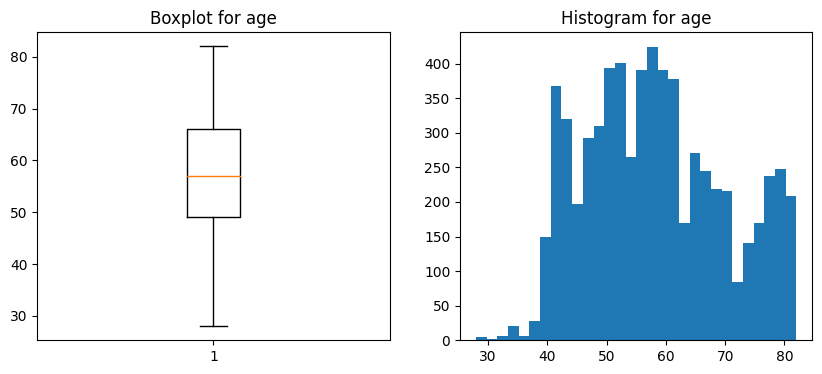

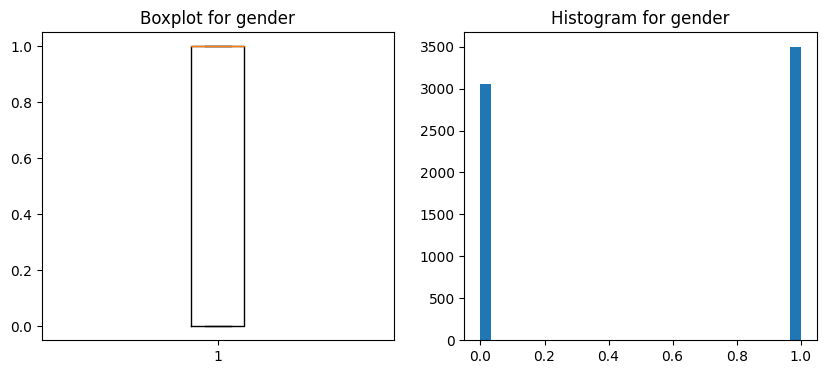

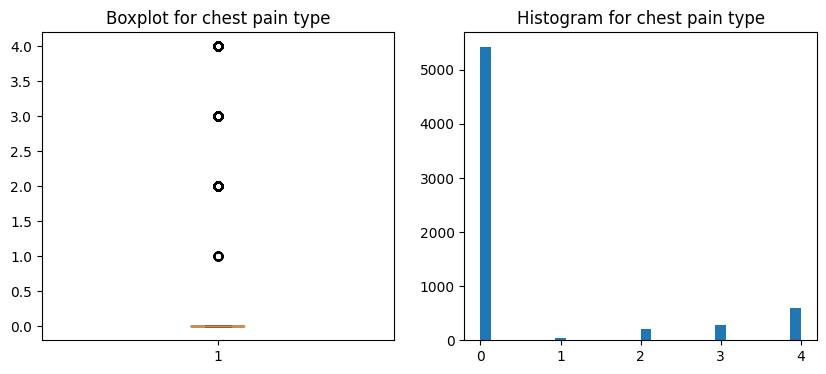

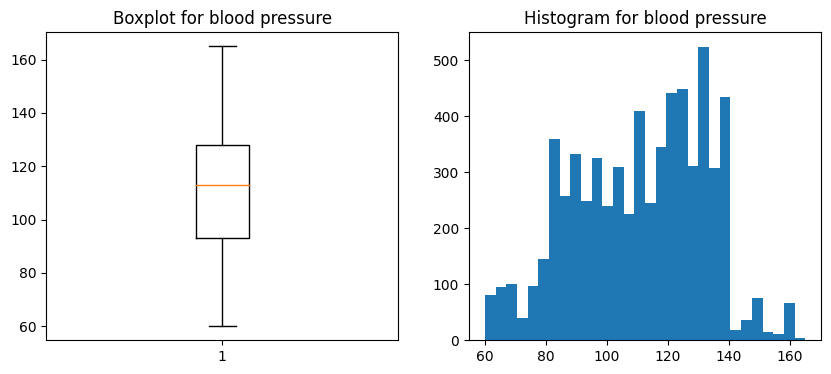

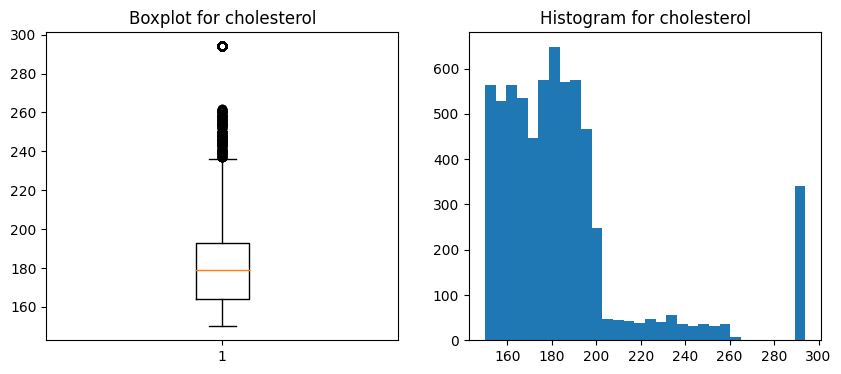

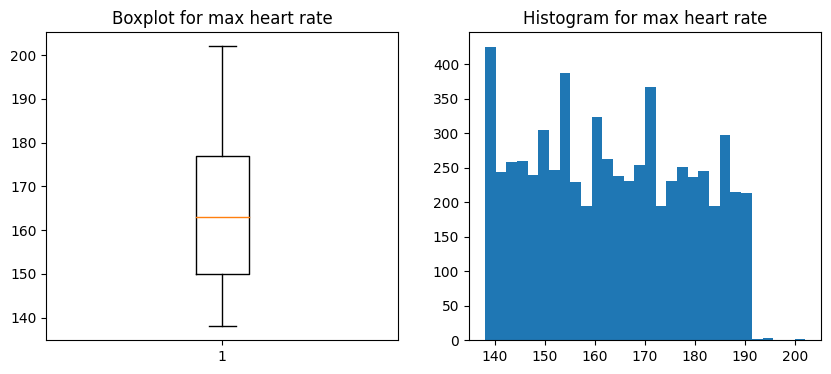

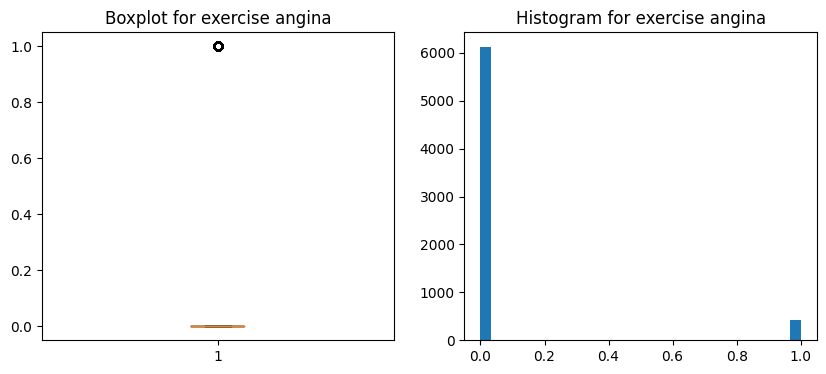

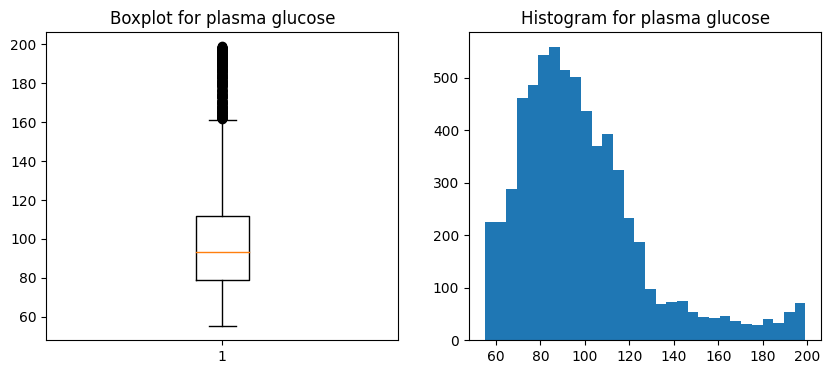

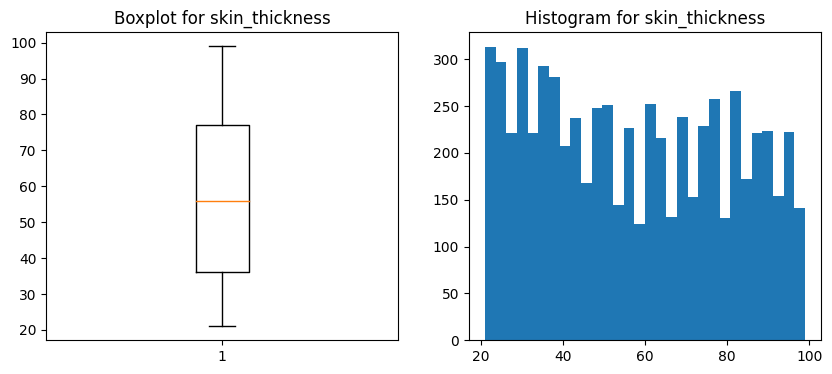

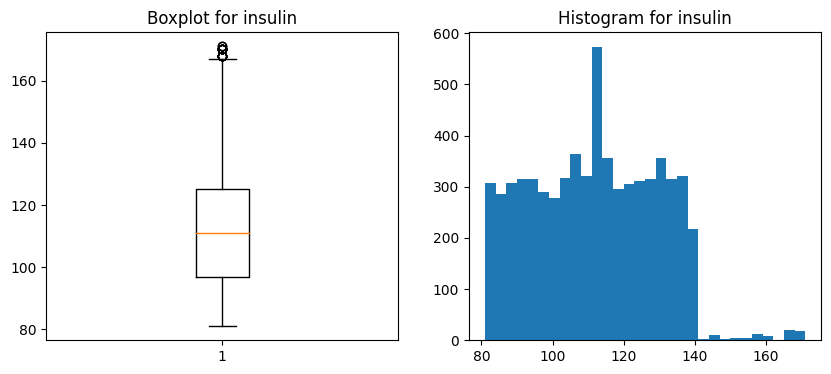

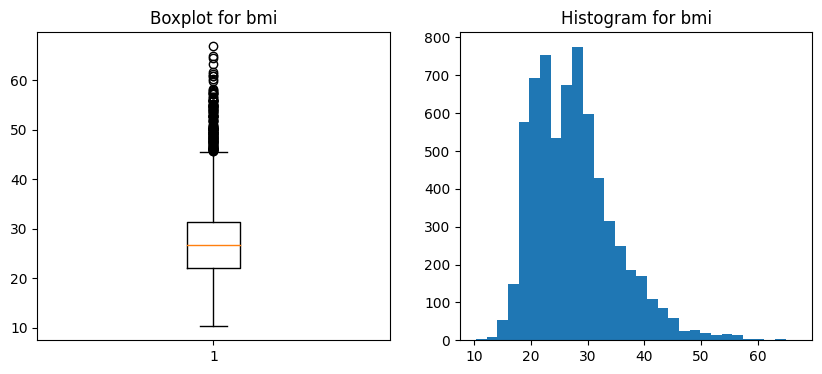

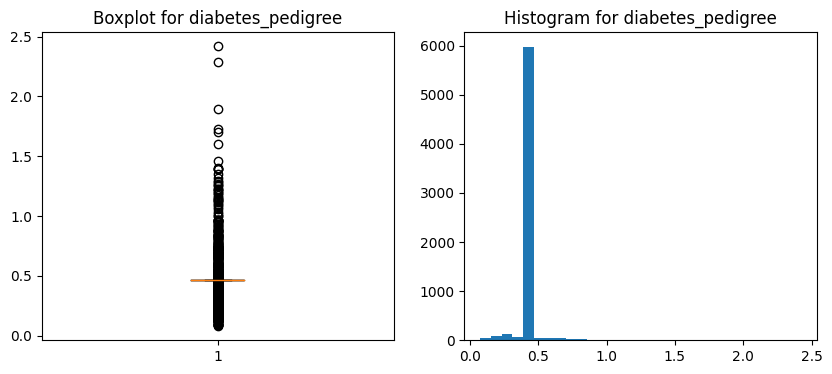

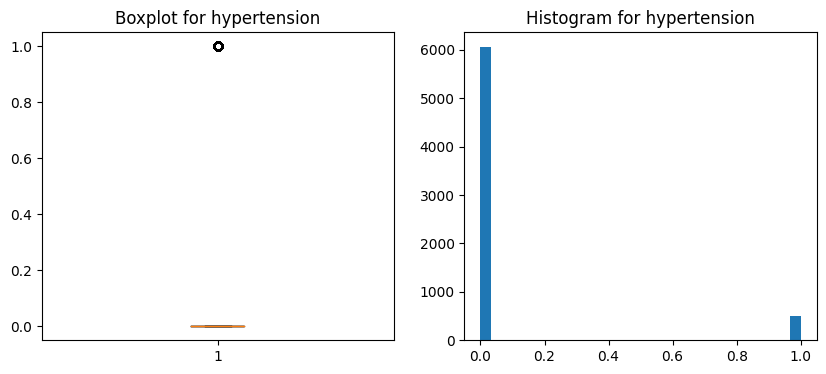

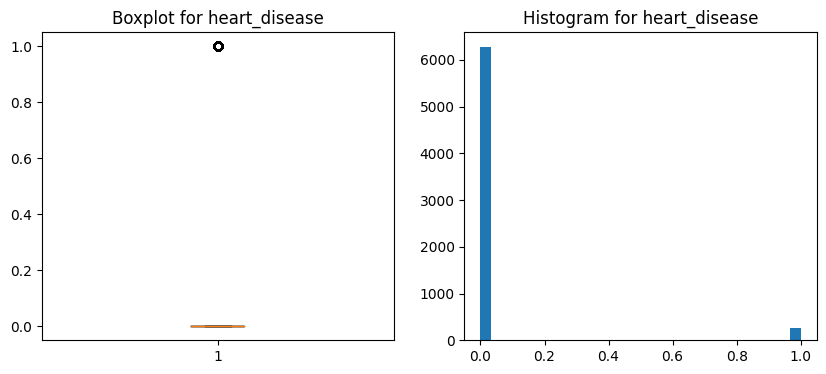

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

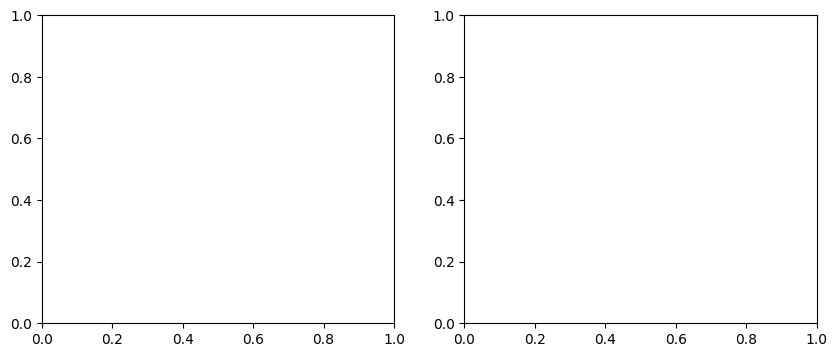

In [29]:
boxplots_data(df_x)

<html>
    <header> <br>
        <body> 
            <font size="6">4. Análisis correlacional</font><br><br>
        </body>
    </header>
</html>

In [ ]:
corr_matrix = df_x.corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 12))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

<html>
    <header> <br>
        <body> 
            <font size="6">5. Análisis por variables</font><br><br>
        </body>
    </header>
</html>

In [12]:
df_x.groupby(["age"]).mean()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,,,,,,,,,,,,
29,1.000000,1.000000,130.000000,204.000000,0.000000,0.000000,202.000000,0.000000,0.000000,2.000000,0.000000,2.000000
34,0.500000,2.000000,118.000000,196.000000,0.000000,0.500000,183.000000,0.000000,0.350000,2.000000,0.000000,2.000000
35,0.750000,0.250000,126.500000,213.750000,0.000000,0.750000,160.500000,0.500000,0.750000,1.750000,0.000000,2.500000
37,0.500000,2.000000,125.000000,232.500000,0.000000,1.000000,178.500000,0.000000,1.750000,1.000000,0.000000,2.000000
38,1.000000,2.333333,132.000000,193.666667,0.000000,1.000000,176.000000,0.333333,1.266667,1.666667,2.666667,2.333333
39,0.500000,1.500000,122.500000,239.750000,0.000000,0.750000,163.250000,0.000000,0.300000,1.500000,0.000000,2.250000
40,1.000000,1.000000,134.000000,196.333333,0.000000,0.666667,157.666667,0.666667,1.133333,1.666667,0.000000,3.000000
41,0.600000,1.200000,119.000000,220.700000,0.000000,0.600000,164.700000,0.100000,0.340000,1.800000,0.100000,2.000000
42,0.750000,1.250000,127.000000,246.750000,0.125000,0.750000,160.250000,0.125000,0.500000,1.375000,0.250000,2.000000


In [13]:
df_x.groupby(["sex"]).mean()

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
sex,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966


In [14]:
df_x.groupby(["cp"]).mean()

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
cp,,,,,,,,,,,,
0,55.692308,0.727273,132.020979,250.132867,0.125874,0.475524,140.538462,0.559441,1.383217,1.258741,0.965035,2.447552
1,51.360000,0.640000,128.400000,244.780000,0.100000,0.620000,162.420000,0.080000,0.316000,1.680000,0.420000,2.140000
2,53.517241,0.597701,130.379310,243.172414,0.195402,0.597701,155.609195,0.126437,0.797701,1.505747,0.586207,2.206897
3,55.869565,0.826087,140.869565,237.130435,0.217391,0.391304,155.956522,0.173913,1.391304,1.260870,0.478261,2.260870


In [15]:
df_x.groupby(["fbs"]).mean()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall
fbs,,,,,,,,,,,,
0,53.906977,0.674419,0.926357,130.325581,245.976744,0.546512,149.728682,0.321705,1.036822,1.414729,0.670543,2.321705
1,57.000000,0.733333,1.200000,139.066667,247.911111,0.422222,149.177778,0.355556,1.055556,1.311111,1.066667,2.266667


In [16]:
df_x.groupby(["exng"]).mean()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall
exng,,,,,,,,,,,,
0,53.754902,0.637255,1.250000,130.799020,243.848039,0.142157,0.553922,155.681373,0.806863,1.509804,0.647059,2.225490
1,55.626263,0.777778,0.383838,133.323232,251.242424,0.161616,0.474747,137.212121,1.519192,1.171717,0.898990,2.494949


In [17]:
df_x.groupby(["exng","cp"]).mean()

age       sex      trtbps        chol       fbs   restecg  \
exng cp                                                                    
0    0   55.761905  0.666667  129.444444  245.904762  0.095238  0.492063   
     1   50.326087  0.652174  127.565217  243.804348  0.086957  0.630435   
     2   53.236842  0.565789  130.460526  242.605263  0.184211  0.605263   
     3   57.473684  0.789474  144.473684  242.105263  0.263158  0.368421   
1    0   55.637500  0.775000  134.050000  253.462500  0.150000  0.462500   
     1   63.250000  0.500000  138.000000  256.000000  0.250000  0.500000   
     2   55.454545  0.818182  129.818182  247.090909  0.272727  0.545455   
     3   48.250000  1.000000  123.750000  213.500000  0.000000  0.500000   

           thalachh   oldpeak       slp       caa     thall  
exng cp                                                      
0    0   148.253968  1.071429  1.428571  0.920635  2.317460  
     1   164.282609  0.339130  1.673913  0.347826  2.173913  
     2   156.631579  0.761842  1.552632  0.631579  2.184211  
     3   155.684211  1.242105  1.210526  0.526316  2.210526  
1    0   134.462500  1.628750  1.125000  1.000000  2.550000  
     1   141.000000  0.050000  1.750000  1.250000  1.750000  
     2   148.545455  1.045455  1.181818  0.272727  2.363636  
     3   157.250000  2.100000  1.500000  0.250000  2.500000

<html>
    <header> <br>
        <body> 
            <font size="6">6. Normalización</font><br><br>
        </body>
    </header>
</html>

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = df_x.columns)
df_scaled.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


### Validamos el efecto de la normalización en la correlación de los datos

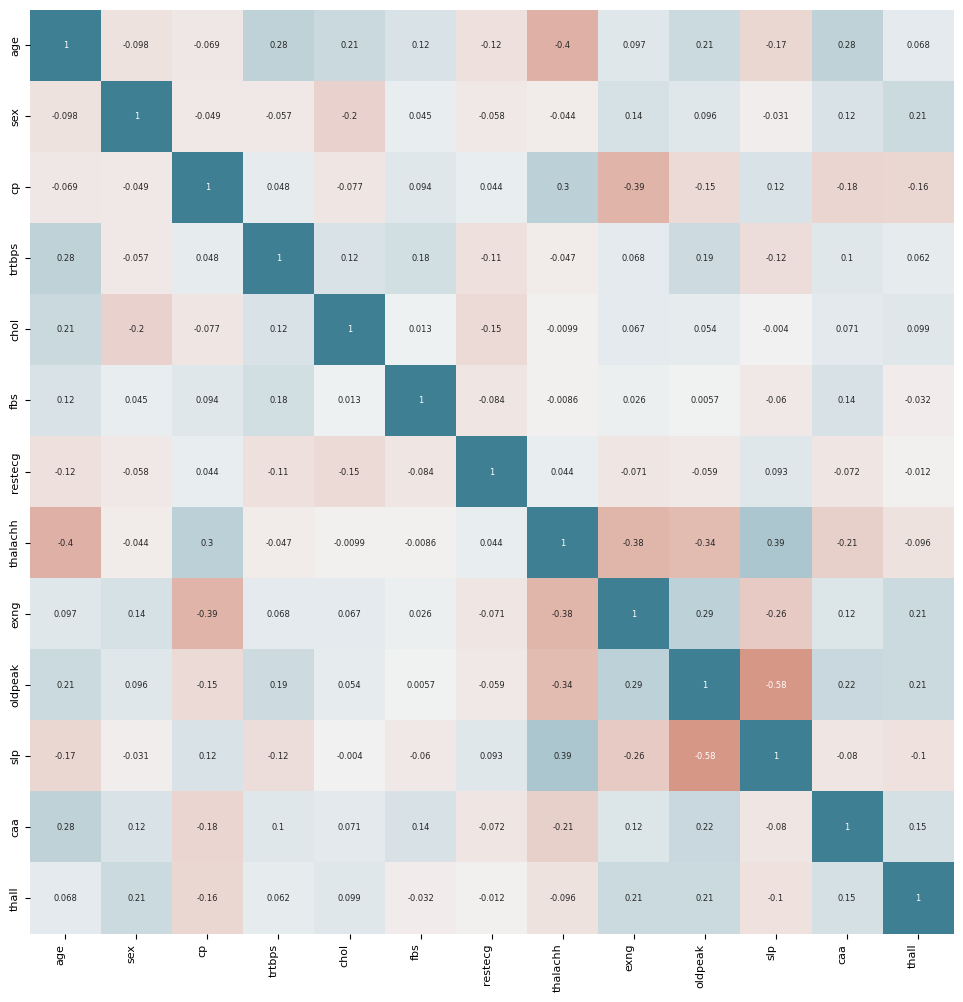

In [19]:
corr_matrix = df_scaled.corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 12))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

<html>
    <header> <br>
        <body> 
            <font size="6">7. Implementación de algoritmo: Regresión Logística</font><br><br>
        </body>
    </header>
</html>

<html>
    <header> <br>
        <body> 
            <font size="5">7.1 Implementación inicial con parámetros por defecto</font><br><br>
        </body>
    </header>
</html>

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_y, test_size=0.3, random_state=seed)

In [62]:
X = X_train.values
y = np.ravel(y_train.values)

# Creamos un modelo de regresión logística
lr = LogisticRegression(random_state=seed)

# Realizamos cross-validation con 5 folds
scores = cross_val_score(lr, X, y, cv=5, scoring="recall")

# Imprimimos los resultados de cada fold y la precisión media
print("Recall por fold: ", scores)
print("Recall medio: ", scores.mean())

Recall por fold:  [0.86956522 0.82608696 0.86956522 0.95652174 0.69565217]
Recall medio:  0.8434782608695652


In [65]:
lrmodel = LogisticRegression(random_state=seed)
lrmodel.fit(X, y)

y_pred = lrmodel.predict(X_test.values)

recall = metrics.recall_score(y_test, y_pred, average='macro')
print(recall)

0.8102439024390244


In [28]:
recall = metrics.recall_score(y_test, y_pred)
print(recall)

0.84


In [23]:
matriz_confusion = metrics.classification_report(y_test, y_pred) 
print(matriz_confusion)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



<html>
    <header> <br>
        <body> 
            <font size="5">7.2 Búsqueda de hiperparámetros por algoritmo genético</font><br><br>
        </body>
    </header>
</html>

In [74]:
lrmodel_tuning = LogisticRegression(random_state=seed)

mutation_adapter = ExponentialAdapter(initial_value=0.9, end_value=0.1, adaptive_rate=0.01)
crossover_adapter = ExponentialAdapter(initial_value=0.1, end_value=0.9, adaptive_rate=0.01)

param_grid = {'tol'      : Continuous(0.00005, 0.0005),
              'solver'   : Categorical(['lbfgs', 'liblinear', 'saga']),
              'max_iter' : Integer(50, 200)}

cv = KFold(n_splits=5, shuffle=True, random_state=seed)

evolved_estimator = GASearchCV(estimator=lrmodel_tuning,
                               cv=cv,
                               scoring='recall',
                               population_size=25,
                               generations=35,
                               mutation_probability=mutation_adapter,
                               crossover_probability=crossover_adapter,
                               param_grid=param_grid,
                               n_jobs=-1)

evolved_estimator.fit(X, y)

y_predict_ga = evolved_estimator.predict(X_test.values)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	25    	0.879607	1.11022e-16	0.879607   	0.879607   
1  	50    	0.879607	1.11022e-16	0.879607   	0.879607   
2  	50    	0.879607	1.11022e-16	0.879607   	0.879607   
3  	50    	0.879607	1.11022e-16	0.879607   	0.879607   
4  	50    	0.879607	1.11022e-16	0.879607   	0.879607   
5  	50    	0.879607	1.11022e-16	0.879607   	0.879607   
6  	50    	0.879607	1.11022e-16	0.879607   	0.879607   
7  	50    	0.879607	1.11022e-16	0.879607   	0.879607   
8  	50    	0.879607	1.11022e-16	0.879607   	0.879607   
9  	50    	0.879607	1.11022e-16	0.879607   	0.879607   
10 	50    	0.879607	1.11022e-16	0.879607   	0.879607   
11 	50    	0.879607	1.11022e-16	0.879607   	0.879607   
12 	50    	0.879607	1.11022e-16	0.879607   	0.879607   
13 	50    	0.879607	1.11022e-16	0.879607   	0.879607   
14 	50    	0.879607	1.11022e-16	0.879607   	0.879607   
15 	50    	0.879607	1.11022e-16	0.879607   	0.879607   
16 	50    	0.879607	1.11022e-16	0.879607   	0.87

In [75]:
print(evolved_estimator.best_params_)

{'tol': 0.00022361865163268471, 'solver': 'liblinear', 'max_iter': 64}


In [76]:
recall = metrics.recall_score(y_test, y_predict_ga, average='macro')
print(recall)

0.8102439024390244


In [77]:
matriz_confusion = metrics.classification_report(y_test, y_predict_ga) 
print(matriz_confusion)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

